## question 6 

In [32]:
from collections import Counter
from random import shuffle
from random import seed 
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def bag_of_words(list_of_wrods:list)->dict:
    """"
    input: list of strings (or string)
    output: dict containing word counts from list
    """
    return Counter(list_of_wrods)



## question 7


In [3]:
def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

def read_data(file):
    '''
    Read each file into a list of strings.
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on',
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = filter(None, words)
    return list(words)


def load_and_shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = '/mnt/c/Users/buzga/Desktop/School/grad_school/spring_2023/machine_learning/homework/hw3/data/pos'
    neg_path = '/mnt/c/Users/buzga/Desktop/School/grad_school/spring_2023/machine_learning/homework/hw3/data/neg'

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    shuffle(review)
    return review

# Taken from http://web.stanford.edu/class/cs221/ Assignment #2 Support Code
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale
data=load_and_shuffle_data()

In [4]:
def train_test_split(data: list)->list:
    """"
    input: list of data from read data function
    output: X_train, X_validate: training,validation bag of words dicts, y_train, y_validate: training and validation labels 
    reshuffles data with a set seed for reproducabilty
    """
    rng=np.random.default_rng(15100873)
    rng.shuffle(data)
    train=data[:1500]
    X_train=[bag_of_words(review[:-1]) for review in train]
    y_train=[review[-1] for review in train]
    validate=data[1500:None]
    X_validate=[bag_of_words(review[:-1]) for review in validate]
    y_validate=[review[-1] for review in validate]
    return X_train, y_train, X_validate, y_validate
X_train, y_train, X_validate, y_validate=train_test_split(data)


## question 8

In [12]:

def Pegasos_naive(X_train, y_train,epochs=5000, regularization_coef=.05):
    """
    input: 
    X_train: training data of shape (NxD) (each row is dictionary storign the word counts of that documnet )
    y_train: training labels of shape (Nx1) (array)
    epochs: number of epochs to run over (int)
    regularization_coef: lambda value used for normalization (float)
    output: 
    w: dictionary of length d with all words and asociated learned weights 
     
    """
    ## set up
    rng=np.random.default_rng(15100873)
    w_t=dict() ## initilize w
    #rng=np.random.default_rng(15100873) ## initilize random number generator with seed 
    curent_epoch=0 ##  epoch counter
    data=list(zip(X_train, y_train)) ## zip data togther to make easy to loop through
    t=0
    while(curent_epoch<=epochs): 
        rng.shuffle(data) 
        for x_i,y_i in data:
            t+=1
            eta_t=(1)/(regularization_coef*t)
            margin=y_i*dotProduct(w_t, x_i)
            scale=(-1)*eta_t*regularization_coef
            increment(d1=w_t, scale=scale, d2=w_t)
            if margin<1: ## go through each dictionary. if we get the reveiew wrong 
                scale=eta_t*y_i
                increment(d1=w_t, scale=scale, d2=x_i) ## we incremnt w_t meaning words in that document are now explicitly included in w_t
        curent_epoch+=1
        print(curent_epoch)
    return w_t
w_1=Pegasos_naive(X_train, y_train, epochs=10)


1
2
3
4
5
6
7
8
9
10
11


## question 9

In [17]:

def Pegasos_better(X_train, y_train,epochs=5000, regularization_coef=.05):
    """
    input: 
    X_train: training data of shape (NxD) (each row is dictionary storign the word counts of that documnet )
    y_train: training labels of shape (Nx1) (array)
    epochs: number of epochs to run over (int)
    regularization_coef: lambda value used for normalization (float)
    output: 
    w: dictionary of length d with all words and asociated learned weights 
     
    """
    ## set up
    rng=np.random.default_rng(15100873)
    W_t=dict() ## which represnts 1/s_t times our independent output 
    curent_epoch=0 ##  epoch counter
    data=list(zip(X_train, y_train)) ## zip data togther to make easy to loop through
    t=1
    s_t=1 ## intiilize s_t
    while(curent_epoch<=epochs): 
        rng.shuffle(data) 
        for x_i,y_i in data:
            t=t+1
            eta_t=(1)/(regularization_coef*t)
            margin=y_i*dotProduct(W_t, x_i)
            a=1-eta_t*regularization_coef
            s_t=(a)*s_t ## s_t updates  
            if margin<1:
                scale=(1/s_t)*eta_t*y_i
                increment(d1=W_t, scale=scale, d2=x_i) ##update w_t
        curent_epoch+=1
    w_t={key:W_t[key]*s_t for key in W_t.keys() } ## calulate intended value w_t
    return w_t
w_2=Pegasos_better(X_train, y_train, epochs=10)



In [18]:
for key in w_1.keys():
        if key in w_2.keys():
                print("word: {} \n,naive value={}\n better value={}".format(key,w_1[key], w_2[key]))
        else:
                print("word: {} not in both dictionaries\n naive value={}\n implicit better value=0".format(key, w_1[key]))

word: anyone 
,naive value=-0.04363636363636401
 better value=-0.036361432640445564
word: who 
,naive value=0.04363636363636364
 better value=0.0012120477546813725
word: saw 
,naive value=-0.052121212121212256
 better value=-0.016968668565541297
word: alan 
,naive value=-0.0024242424242424767
 better value=-1.007617721155457e-16
word: rickman's 
,naive value=0.003636363636363645
 better value=0.003636143264044571
word: finelyrealized 
,naive value=0.0012121212121212173
 better value=0.0012120477546815236
word: performances 
,naive value=0.13939393939393954
 better value=0.12605296648687833
word: in 
,naive value=0.03515151515151479
 better value=0.024240955093630064
word: truly 
,naive value=0.0012121212121213244
 better value=0.00606023877340751
word: madly 
,naive value=0.0012121212121212314
 better value=0.004848191018726115
word: deeply 
,naive value=0.024242424242424288
 better value=0.018180716320222858
word: and 
,naive value=0.07030303030303005
 better value=0.05939033997939426

## question 11 

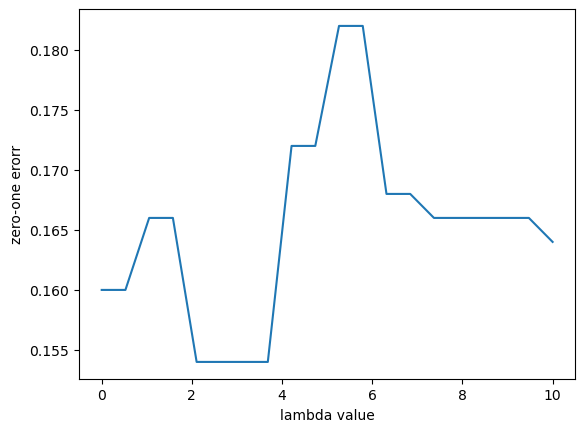

In [26]:
np.random.default_rng(15100873)
def classification_error(w, X, y):
    """
    input: 
    w: wieght dictionary of size d (effectily a DX1 vector)
    X: array of word counts for each document size (nXd)
    y: lables for each document Nx1 array
    output: 
    percentage of documents missclassfied using Xw to predict y.
    """
    np.random.default_rng(15100873)
    fixed_dot = lambda x: dotProduct(w,x)
    preds=np.array(list(map(fixed_dot, X)))
    margins=np.array(y)*preds
    return np.sum(margins<0)/len(margins) 
def test_error_over_alpha(min_alpha, max_alpha,X_train, y_train, X_test, y_test,granulairty=20, epochs=100):
    np.random.default_rng(15100873)
    out=[]
    plt_range=np.linspace(min_alpha, max_alpha,granulairty)
    for alpha in plt_range:
        w=Pegasos_better(X_train, y_train, epochs=epochs, regularization_coef=alpha)
        out.append(classification_error(w, X_test, y_test))
    plt.plot(plt_range, out)
    plt.xlabel("lambda value")
    plt.ylabel("zero-one erorr")
    plt.show()


test_error_over_alpha(min_alpha=.000001, max_alpha=10, X_train=X_train,y_train=y_train, X_test=X_validate, y_test=y_validate,granulairty=20)
lambda_opt=7

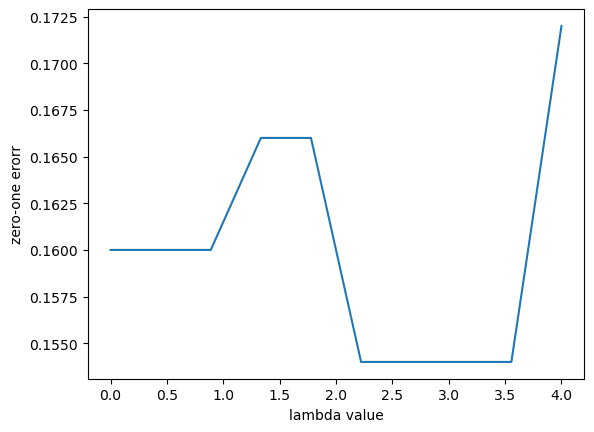

In [28]:
test_error_over_alpha(min_alpha=.000001, max_alpha=4, X_train=X_train,y_train=y_train, X_test=X_validate, y_test=y_validate,granulairty=5)

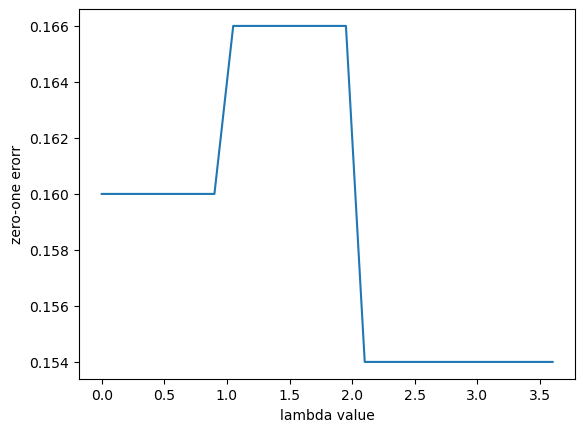

In [30]:
test_error_over_alpha(min_alpha=.000001, max_alpha=3.6, X_train=X_train,y_train=y_train, X_test=X_validate, y_test=y_validate,granulairty=25)

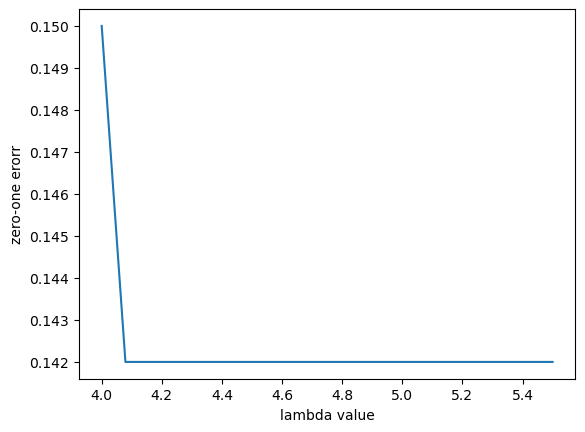

In [ ]:
test_error_over_alpha(min_alpha=4, max_alpha=5.5,  X_train=X_train,y_train=y_train, X_test=X_validate, y_test=y_validate,granulairty=20)


## question 13

overall corelation between absolute value of score and accuracy is 0.6427499319207365


lower bound  upper bound  test_accuracy
0    -0.213710    -0.157938       1.000000
1    -0.147895    -0.118831       1.000000
2    -0.111254    -0.075547       1.000000
3    -0.075481    -0.029241       0.918367
4    -0.028730     0.016665       0.648485
5     0.016820     0.064126       0.854962
6     0.064548     0.111521       0.924528
7     0.112076     0.155227       0.944444
8     0.157160     0.246573       1.000000

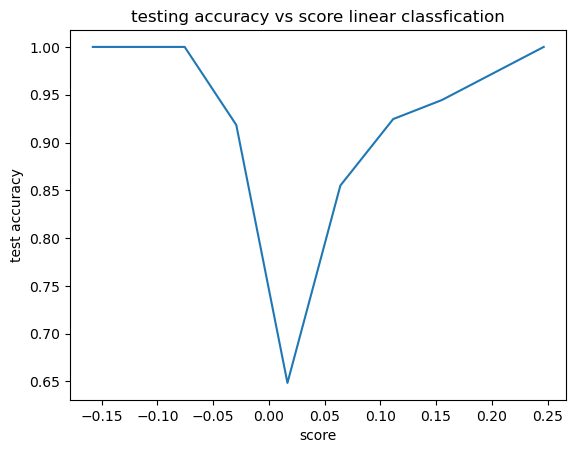

In [33]:
lambda_opt=5
def bin_preds_and_y(preds, y):
    preds_and_label=list(zip(preds,y))
    preds_and_label.sort(key=lambda w: w[0])
    out=[]
    cur=[[],[]]
    i=0
    j=1
    range_preds=max(preds)-min(preds)
    while(i<len(preds)):
        cur[0].append(preds_and_label[i][0])
        cur[1].append(preds_and_label[i][1])
        if(preds_and_label[i][0]>=(min(preds)+(j*(range_preds/10)))):
            out.append(np.array(cur))
            cur=[[],[]]
            j=j+1
        i+=1
    return out
def check_group_accuracy(outs):
    out_2=[[],[]]
    upper_bounds=[]
    lower_bounds=[]
    acurracy=[]
    for bin in outs:
        cor=np.correlate(bin[0],bin[1])
        b_1=np.array(bin[1])*np.array(bin[0])
        a=np.sum(b_1>0)/len(bin[1])
        b=max(bin[0])#, min(bin[0])]
        lower_bounds.append(min(bin[0]))
        upper_bounds.append(max(bin[0]))
        acurracy.append(a)
        #print("accuracy in range {1}-{0} is {2}".format(max(bin[0]), min(bin[0]), a))
        out_2[0].append(a)
        out_2[1].append(b)
    cor=np.corrcoef(np.abs(out_2[1]),out_2[0])[0,1]
    print("overall corelation between absolute value of score and accuracy is {0}".format(cor))
    return out_2, upper_bounds, lower_bounds, acurracy
w=Pegasos_better(X_train, y_train, epochs=5, regularization_coef=lambda_opt)
fixed_dot = lambda x: dotProduct(w,x)
preds=np.array(list(map(fixed_dot, X_validate)))
out=bin_preds_and_y(preds, y_validate)
out_2,upper_bounds, lower_bounds, acurracy=check_group_accuracy(out)
plt.plot(out_2[1], out_2[0])
plt.xlabel("score")
plt.ylabel("test accuracy")
plt.title("testing accuracy vs score linear classfication")
df=pd.DataFrame(data=lower_bounds, columns=["lower bound"])
df["upper bound"]=upper_bounds
df["test_accuracy"]=acurracy
df

## question 14

In [34]:
import pandas as pd
def get_missclass_examples(X_train, X_validate ,y_train, y_validate, num=1):
    """"returns the n missclassfied examples on the validation set"""
    w=Pegasos_better(X_train, y_train, epochs=5, regularization_coef=lambda_opt)
    fixed_dot = lambda x: dotProduct(w,x)
    preds=np.array(list(map(fixed_dot, X_validate)))
    i=1
    for x,right in zip(X_validate,preds*y_validate): 
        if right<0 and i>=num:
            return  x,w
        elif right<0 and i<num:
            i=i+1
def feature_importance(x,w):
    out=dict()
    for key in x.keys():
        try:
            out[key]=(np.abs(x[key]*w[key]))
        except:
            out[key]=0
            w[key]=0
    return dict(sorted(out.items(), key=lambda item: item[1]))
lambda_opt=7
x,w=get_missclass_examples(X_train, X_validate ,y_train, y_validate)
features_important=feature_importance(x,w)
df=pd.DataFrame.from_dict(features_important, orient='index',columns=['|w_ix_i|'])
df["w_i"]=w
df["x_i"]=x
df.tail(7)

|w_ix_i|       w_i  x_i
and   0.009999  0.000667   15
only  0.010285 -0.003428    3
i     0.011062  0.000651   17
with  0.011269  0.001127   10
the   0.013618  0.000413   33
a     0.013649 -0.000682   20
have  0.016998 -0.002428    7

In [ ]:
x,w=get_missclass_examples(X_train, X_validate ,y_train, y_validate, num=2)
features_important=feature_importance(x,w)
df=pd.DataFrame.from_dict(features_important, orient='index',columns=['|w_ix_i|'])
df["w_i"]=w
df["x_i"]=x

df.tail(7)


|w_ix_i|       w_i  x_i
also  0.037118  0.012373    3
have  0.044827 -0.014942    3
two   0.046160 -0.009232    5
of    0.059960 -0.003997   15
and   0.063386  0.003521   18
the   0.115637  0.002570   45
to    0.117065 -0.007804   15

In [ ]:
x,w=get_missclass_examples(X_train, X_validate ,y_train, y_validate, num=10)
features_important=feature_importance(x,w)
df=pd.DataFrame.from_dict(features_important, orient='index',columns=['|w_ix_i|'])
df["w_i"]=w
df["x_i"]=x
df.tail(7)

|w_ix_i|       w_i  x_i
a    0.061864 -0.002475   25
you  0.068526  0.013705    5
as   0.073094  0.009137    8
and  0.077472  0.003521   22
of   0.083944 -0.003997   21
to   0.132673 -0.007804   17
the  0.133625  0.002570   52